In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import wave
import ffmpeg
import scipy.signal
import time

sns.set()
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [2]:
def remove_close_values(arr):
    min_value = min(arr)  # 配列内の最小値を取得

    # 近い値を削除
    filtered_arr = [min_value]
    for num in arr:
        if abs(num - min_value) > 1:  # 1以内の範囲外の値を残す
            filtered_arr.append(num)

    return filtered_arr

In [18]:
def find_two_largest_numbers(arr):
    arr = np.array(arr)  # リストをNumPy配列に変換
    sorted_indices = np.argsort(arr)[::-1]  # 値を基準に配列を大きい順にソートしたインデックスを取得
    result = []
    count = 0
    i = 0
    while count < 10 and i < len(sorted_indices):
        current_index = sorted_indices[i]
        if any(abs(current_index - index) <= 100000 for index in result):
            i += 1
            continue
        result.append(current_index)
        count += 1
        i += 1
    return np.array(result)

In [4]:
def start_t():
    global start_time
    start_time = time.time()

def end_t():
    if "start_time" in globals():
        end_time = time.time() - start_time
        print("{:.9f} [sec]".format(end_time))
        return end_time
    else:
        print("start関数が呼ばれていない")

In [20]:
wav_file_name = './test/kitasota_2.wav'

# stream = ffmpeg.input("./videos/kitasota_2_short_2.mp4") 
# stream = ffmpeg.output(stream, wav_file_name) 
# ffmpeg.run(stream, overwrite_output=True)


audio_path_a = wav_file_name
audio_path_b = './videos/kill_audio_test_trim.wav'


start_t()
# 音声データAの読み込み
audio_a, sr_a = librosa.load(audio_path_a, sr=None)

# 音声データBの読み込み
audio_b, sr_b = librosa.load(audio_path_b, sr=None)
end_t()


# 音声データBの長さ
len_a = len(audio_a)
len_b = len(audio_b)

# 最初の10000フレームだけを計算する
# print(len(audio_a))
# print(len_b)

# start_t()
# correlation = scipy.signal.correlate(audio_a[:100000], audio_b, mode='valid', method='fft')
# end_time = end_t()
# print(end_time * len(audio_a)/100000)


# 音声データAと音声データBの相互相関を計算
# correlation = np.correlate(audio_a, audio_b, mode='valid')
correlation = scipy.signal.correlate(audio_a, audio_b, mode='valid', method='direct')

# top_10_indices = np.argsort(correlation)[::-1][:10]
# print(np.array(top_10_indices) / sr_a)
# print(correlation[top_10_indices])
# print(np.argmax(correlation) / sr_a)
# print(np.max(correlation))

result = find_two_largest_numbers(correlation)
print(result)
print(result/sr_a)

max_indexes = np.where(correlation > 850)[0]

# cors = [element for index, element in enumerate(correlation) if element > 600]

start_times = []


for idx in max_indexes:
    # 音声データBが出現する開始時間を計算（サンプル数から秒単位に変換）
    start_time = idx / sr_a
    # 音声データBが出現する終了時間を計算（開始時間に音声データBの長さを加算）
    end_time = start_time + (len_b / sr_a)
    print(str(correlation[idx]) + ', ' + str(start_time) + ' : ' + str(end_time))
    start_times.append(start_time)

# start_times_new = remove_close_values(start_times)
# print('result: ' + str(start_times_new))


5.939233065 [sec]


(array([82., 31., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([300., 310., 320., 330., 340., 350., 360., 370., 380., 390., 400.],
       dtype=float32),
 <BarContainer object of 10 artists>)

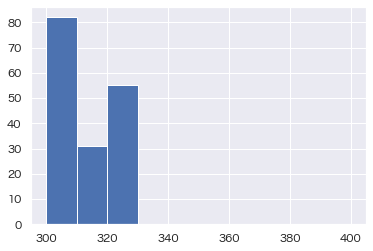

In [77]:
plt.hist(correlation, range=[300, 400])

In [65]:
start_times_new = remove_close_values(start_times)
print('result: ' + str(start_times_new))

result: [2309.0066439909297]


In [49]:
segments = []

for start_time in start_times:
    segments.append((start_time-3, start_time+3))

print(segments)

[(27.662479166666667, 33.66247916666667), (93.17714583333333, 99.17714583333333), (252.75047916666668, 258.75047916666665), (275.641125, 281.641125), (275.6411458333333, 281.6411458333333), (335.95047916666664, 341.95047916666664), (355.0438125, 361.0438125), (466.2331458333333, 472.2331458333333), (607.4598125, 613.4598125), (646.2438125, 652.2438125), (654.8624791666666, 660.8624791666666), (692.5584791666666, 698.5584791666666), (904.9104791666666, 910.9104791666666), (923.1718125, 929.1718125), (979.5558125, 985.5558125), (1039.2678125, 1045.2678125), (1163.4278125, 1169.4278125)]


In [50]:
from moviepy.editor import VideoFileClip, concatenate_videoclips

def cut_video(input_file, output_file, segments):
    clips = []
    # enumerate(tqdm(segments, desc='Processing', unit='segment')):
    for i, segment in enumerate(segments):
        start_time = segment[0]
        end_time = segment[1]
        clip = VideoFileClip(input_file).subclip(start_time, end_time)
        clips.append(clip)

    final_clip = concatenate_videoclips(clips)
    final_clip.write_videofile(output_file, audio_codec='aac')


# 切り取りたい区間を指定します（開始時間と終了時間のペアのリスト）


# 入力ファイルと出力ファイルのパスを指定します
input_file = './videos/test_full_2.mp4'
output_file = 'output.mp4'

# 動画の切り取りと連結を実行します
cut_video(input_file, output_file, segments)


Moviepy - Building video output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4


(array([169., 181., 161., 122.,  68.,  36.,  25.,  21.,  12.,   2.,   3.,
          0.,   2.,   1.,   1.,   3.,   1.,   5.,   2.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 600.,  620.,  640.,  660.,  680.,  700.,  720.,  740.,  760.,
         780.,  800.,  820.,  840.,  860.,  880.,  900.,  920.,  940.,
         960.,  980., 1000., 1020., 1040., 1060., 1080., 1100., 1120.,
        1140., 1160., 1180., 1200.], dtype=float32),
 <BarContainer object of 30 artists>)

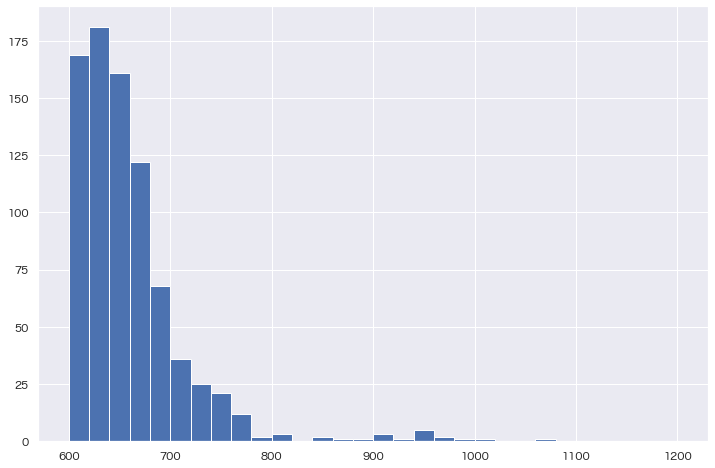

In [9]:
fig = plt.figure(figsize=(12, 8), facecolor='w', linewidth=0, edgecolor='w')
plt.hist(cors, bins=30, range=(600, 1200))

In [56]:
audio_path_a = './videos/audio_full.wav'
audio_path_b = './videos/kill_audio_test_trim.wav'

detect_audio_match(audio_path_a, audio_path_b)

6943083
944.6054, 5.2250625 : 5.750854166666667
1185.677, 5.225083333333333 : 5.750875
944.5805, 5.225104166666667 : 5.750895833333334
957.69916, 82.66508333333333 : 83.19087499999999


In [35]:
start_times = [30, 96, 255, 278, 338, 358, 469, 610, 649, 657, 695, 907, 1042, 1166]

In [42]:


def trim_wav_segment(input_file, output_file, start_time, end_time):
    # 入力ファイルをオープン
    with wave.open(input_file, 'rb') as wav_in:
        # 出力ファイルを作成
        with wave.open(output_file, 'wb') as wav_out:
            # 入力ファイルのパラメータを取得
            channels = wav_in.getnchannels()
            sample_width = wav_in.getsampwidth()
            frame_rate = wav_in.getframerate()
            total_frames = wav_in.getnframes()

            # 開始位置と終了位置をフレーム単位に変換
            start_frame = int(start_time * frame_rate)
            end_frame = int(end_time * frame_rate)

            # 出力ファイルのパラメータを設定
            wav_out.setnchannels(channels)
            wav_out.setsampwidth(sample_width)
            wav_out.setframerate(frame_rate)

            # 指定した範囲のデータを書き込む
            wav_in.setpos(start_frame)
            frames_to_write = end_frame - start_frame
            wav_out.writeframes(wav_in.readframes(frames_to_write))

# 使用例
count = 0
for start_time in start_times:
    trim_wav_segment('./videos/test_full_2.wav', './test/output_' + str(count) + '.wav', start_time, start_time+1)
    count += 1


In [15]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

def plot_waveform(stream, file):
    # Wavファイルを開く
    wf = wave.open(file, 'rb')
    
    # サンプルレートとフレーム数を取得
    sample_rate = wf.getframerate()
    num_frames = wf.getnframes()

    # フレームごとの時間を計算
    frame_time = 1.0 / sample_rate

    # プロットの初期化
    plt.figure()

    # 波形データを読み込む
    data = wf.readframes(num_frames)
    data = np.frombuffer(data, dtype=np.int16)

    # 再生用のコールバック関数を定義
    def callback(outdata, frames, time, status):
        # 再生位置を取得
        current_frame = stream.time * sample_rate

        # 波形データの範囲を計算
        start_frame = int(current_frame)
        end_frame = int(current_frame + frames)
        waveform = data[start_frame:end_frame]

        # 波形をプロット
        plt.clf()
        plt.plot(np.arange(len(waveform)) * frame_time, waveform)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('Real-time Waveform')
        plt.grid(True)
        plt.ylim(-32768, 32767)
        plt.xlim(0, frames * frame_time)
        plt.pause(0.001)

    # 再生ストリームを開始
    stream.start()

    # 再生が終わるまで待機
    while stream.active:
        plt.pause(0.1)

    # 再生ストリームを停止
    stream.stop()
    stream.close()

    # Wavファイルを閉じる
    wf.close()




In [20]:
import pydub
from pydub import AudioSegment


song = AudioSegment.from_wav("./test/output2.wav")
song_array = np.array(song.get_array_of_samples())
song_ch1 = song_array[::2]
song_ch2 = song_array[1::2]

wsize = 64

fig, ax = plt.subplots(1, 1)
vmax, vmin = 0, 0
for index in range(song_ch1.shape[0]//wsize):
    data = song_ch1[index*wsize: (index+1)*wsize]
    x = np.arange(index*wsize, (index+1)*wsize)

    vmax = max(vmax, data.max())
    vmin = min(vmin, data.min())

    ax.set_xlim((x.min(), x.max()))
    ax.set_ylim((vmin, vmax))
    if index == 0:
        lines, = ax.plot(x, data)
    else:
        lines.set_data(x, data)
    # リアルタイム描画したい場合
    plt.pause(.05)  

KeyboardInterrupt: 